# Handwritten Letter recognition via Neural Network

In this file, we will apply the Neural Network algorithm on the data set. The result will be plotted with graphs. The dataset is described here:

https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format

Each sample is a row of flattened pixels values of a upper-case letter image. The labeled results are stored at the first column as numbers from 0-25 representing 26 letters. We will split the data into training data and test data. We will compare the performance across different models and parameters.

# **Imports**

In [2]:
import os 
import keras
import numpy as np
import pandas as pd
import tensorflow as tf

# Handling data imbalance
from imblearn.under_sampling import NearMiss
from keras.utils import np_utils

# Data Split
from sklearn.model_selection import train_test_split

# Data Visualization 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Model 
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, BatchNormalization, Flatten, Dropout, Dense, GlobalAvgPool2D


# **Explore the data**

Since we are using Google Colab, we need to link to our drive to load the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# File path
file_path = 'drive/MyDrive/LetterRecognition/Colab Notebooks/A_Z Handwritten Data.csv'

# Load Data
df = pd.read_csv(file_path)

In [5]:
# The shape of the input
df.shape
# There are 372450 images and each has (785-1) pixels

(372450, 785)

In [47]:
# First 5 rows (the fist column contains labels)
df.head()
# In this example, the first values in rows are zeros, which mean they are all letter 'A'.

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Last 5 rows
df.tail()
# The first values are 25 among the tail rows, which mean they are all letter 'Z'.

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372449,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **check balance**

In [8]:
# Get the labels
y = df.pop('0')


In [9]:
y_mapped = y.replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

In [10]:
# After mapping
y_mapped

0         A
1         A
2         A
3         A
4         A
         ..
372445    Z
372446    Z
372447    Z
372448    Z
372449    Z
Name: 0, Length: 372450, dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


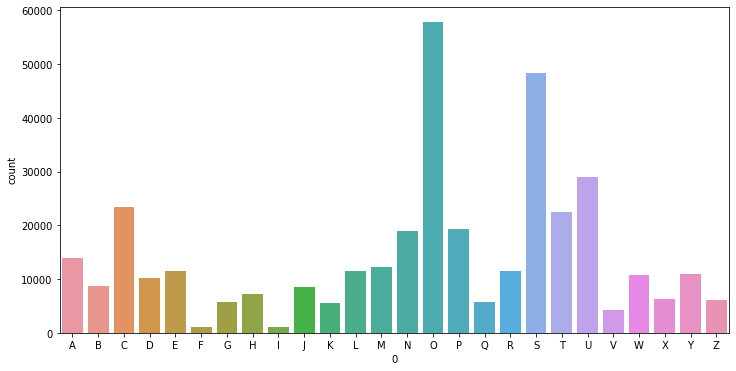

In [11]:
# df['class'].map(class_mapping).unique()
plt.figure(figsize = (12,6))
sns.countplot(y_mapped)

Since the data is not well balanced, we need to balance the dataset first before split and train the data.

# **Data processing**

Balance first

In [12]:
nm = NearMiss()
X_data, y_data = nm.fit_resample(df, y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


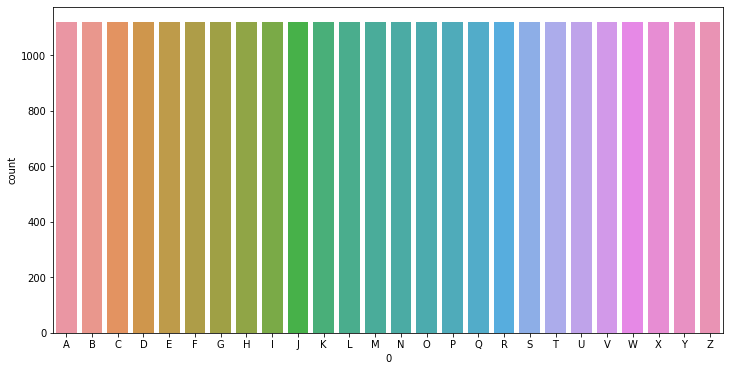

In [13]:
# Visualize again
y_data_mapped = y_data.replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
plt.figure(figsize = (12,6))
sns.countplot(y_data_mapped)

Split and prepare for training

In [14]:
y_data.shape, X_data.shape

((29120,), (29120, 784))

In [15]:
X_data = X_data.to_numpy().reshape(-1,28,28, 1)

In [16]:
# Random_state is used to control the split result across different executions
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_data, y_data,   
    test_size = 0.07, random_state=10, shuffle=True, stratify=y_data
)

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val, test_size=0.15)

It seems that we don't need to use One-Hot-Encoding on labels to train the model. However, we do need to use argmax() function when predicting the test data.

# **Data Visualization**

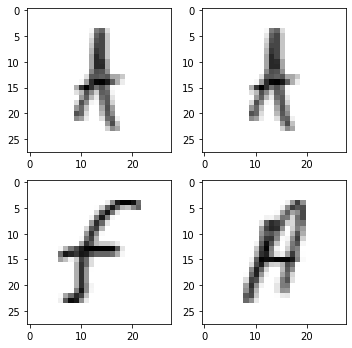

In [46]:

figure, grid = plt.subplots(2,2)
figure.set_size_inches(5,5)
ind = 0
for i in range(2):
    for j in range(2):
        image = X_data[ind].reshape(28,28)
        grid[i,j].imshow(image, cmap='binary')
        ind += 1
    plt.tight_layout()


# Model

### model1

Epoch 1/60
720/720 [==============================] - 7s 9ms/step - loss: 8.1002 - accuracy: 0.0668 - val_loss: 3.5632 - val_accuracy: 0.0793
Epoch 2/60
720/720 [==============================] - 6s 8ms/step - loss: 3.1016 - accuracy: 0.1278 - val_loss: 2.7994 - val_accuracy: 0.1647
Epoch 3/60
720/720 [==============================] - 6s 9ms/step - loss: 2.6131 - accuracy: 0.1968 - val_loss: 2.4727 - val_accuracy: 0.2134
Epoch 4/60
720/720 [==============================] - 6s 9ms/step - loss: 2.3977 - accuracy: 0.2435 - val_loss: 2.3585 - val_accuracy: 0.2498
Epoch 5/60
720/720 [==============================] - 8s 12ms/step - loss: 2.2460 - accuracy: 0.2865 - val_loss: 2.1956 - val_accuracy: 0.2953
Epoch 6/60
720/720 [==============================] - 6s 9ms/step - loss: 2.1312 - accuracy: 0.3262 - val_loss: 2.0451 - val_accuracy: 0.3443
Epoch 7/60
720/720 [==============================] - 6s 9ms/step - loss: 2.0385 - accuracy: 0.3503 - val_loss: 1.9613 - val_accuracy: 0.3702
Epoch

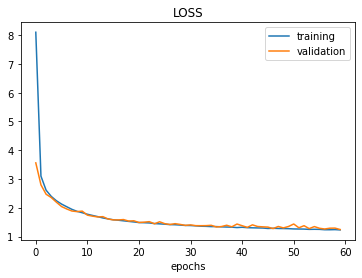

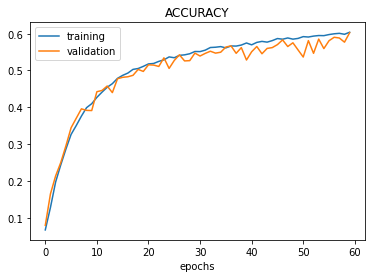

64/64 [==============================] - 0s 5ms/step - loss: 1.2369 - accuracy: 0.6194


[1.2368627786636353, 0.6194213032722473]

In [46]:
# Model 1 with 
batch_size = 32
model1_1 = Sequential([
    Conv2D(32, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal', input_shape=(28, 28, 1)),
    MaxPool2D(),
    GlobalAvgPool2D(),
    Dense(32, activation='relu'),
    Dense(26, activation='sigmoid')
])
# Compile
model1_1.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
history1_1 = model1_1.fit(
      X_train, y_train,
      batch_size=batch_size,
      epochs=60,
      validation_data=(X_valid, y_valid),
      shuffle=True
    )

plt.figure(1)
plt.plot(history1_1.history['loss'])
plt.plot(history1_1.history['val_loss'])
plt.legend(['training','validation'])
plt.title('LOSS')
plt.xlabel('epochs')

plt.figure(2)
plt.plot(history1_1.history['accuracy'])
plt.plot(history1_1.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('ACCURACY')
plt.xlabel('epochs')
plt.show()

model1_1.evaluate(X_test,y_test)



Epoch 1/60
180/180 [==============================] - 7s 27ms/step - loss: 7.8532 - accuracy: 0.0447 - val_loss: 3.2499 - val_accuracy: 0.0438
Epoch 2/60
180/180 [==============================] - 3s 19ms/step - loss: 3.2227 - accuracy: 0.0626 - val_loss: 3.2143 - val_accuracy: 0.0660
Epoch 3/60
180/180 [==============================] - 3s 19ms/step - loss: 3.1767 - accuracy: 0.0726 - val_loss: 3.1643 - val_accuracy: 0.0716
Epoch 4/60
180/180 [==============================] - 3s 19ms/step - loss: 3.1078 - accuracy: 0.0784 - val_loss: 3.0935 - val_accuracy: 0.0844
Epoch 5/60
180/180 [==============================] - 3s 19ms/step - loss: 3.0040 - accuracy: 0.0921 - val_loss: 2.9592 - val_accuracy: 0.0950
Epoch 6/60
180/180 [==============================] - 3s 19ms/step - loss: 2.8527 - accuracy: 0.1057 - val_loss: 2.8153 - val_accuracy: 0.1036
Epoch 7/60
180/180 [==============================] - 3s 19ms/step - loss: 2.7376 - accuracy: 0.1185 - val_loss: 2.7152 - val_accuracy: 0.1231

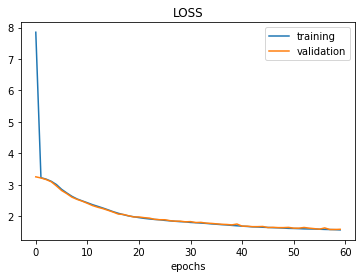

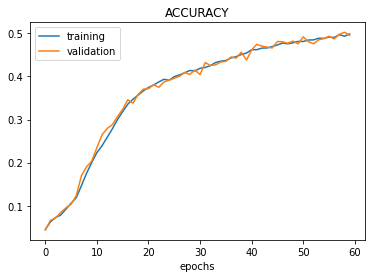

64/64 [==============================] - 0s 4ms/step - loss: 1.5890 - accuracy: 0.5012


[1.589021921157837, 0.5012260675430298]

In [18]:
# Model 1 with 
batch_size = 128
model1_2 = Sequential([
    Conv2D(32, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal', input_shape=(28, 28, 1)),
    MaxPool2D(),
    GlobalAvgPool2D(),
    Dense(32, activation='relu'),
    # Dropout(0.2),
    Dense(26, activation='sigmoid')
])
# Compile
model1_2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
history1_2 = model1_2.fit(
      X_train, y_train,
      batch_size=batch_size,
      epochs=60,
      validation_data=(X_valid, y_valid),
      shuffle=True
    )

plt.figure(1)
plt.plot(history1_2.history['loss'])
plt.plot(history1_2.history['val_loss'])
plt.legend(['training','validation'])
plt.title('LOSS')
plt.xlabel('epochs')

plt.figure(2)
plt.plot(history1_2.history['accuracy'])
plt.plot(history1_2.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('ACCURACY')
plt.xlabel('epochs')
plt.show()

model1_2.evaluate(X_test,y_test)



Epoch 1/60
90/90 [==============================] - 4s 37ms/step - loss: 14.8529 - accuracy: 0.0491 - val_loss: 5.8149 - val_accuracy: 0.0544
Epoch 2/60
90/90 [==============================] - 3s 30ms/step - loss: 5.1069 - accuracy: 0.0698 - val_loss: 4.4919 - val_accuracy: 0.0852
Epoch 3/60
90/90 [==============================] - 3s 30ms/step - loss: 4.1095 - accuracy: 0.0971 - val_loss: 3.7760 - val_accuracy: 0.1105
Epoch 4/60
90/90 [==============================] - 3s 30ms/step - loss: 3.5429 - accuracy: 0.1232 - val_loss: 3.3625 - val_accuracy: 0.1344
Epoch 5/60
90/90 [==============================] - 3s 30ms/step - loss: 3.1946 - accuracy: 0.1465 - val_loss: 3.0876 - val_accuracy: 0.1583
Epoch 6/60
90/90 [==============================] - 3s 30ms/step - loss: 2.9541 - accuracy: 0.1725 - val_loss: 2.8937 - val_accuracy: 0.1752
Epoch 7/60
90/90 [==============================] - 3s 29ms/step - loss: 2.7925 - accuracy: 0.1942 - val_loss: 2.7719 - val_accuracy: 0.1942
Epoch 8/60
9

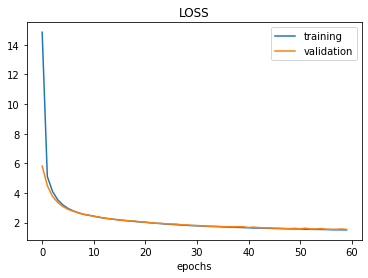

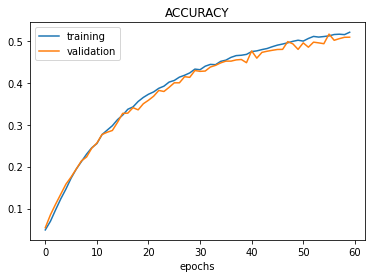

64/64 [==============================] - 0s 4ms/step - loss: 1.5319 - accuracy: 0.5140


[1.531894564628601, 0.5139774680137634]

In [20]:
# Model 1 with 
batch_size = 256
model1_3 = Sequential([
    Conv2D(32, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal', input_shape=(28, 28, 1)),
    MaxPool2D(),
    GlobalAvgPool2D(),
    Dense(32, activation='relu'),
    # Dropout(0.2),
    Dense(26, activation='sigmoid')
])
# Compile
model1_3.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
history1_3 = model1_3.fit(
      X_train, y_train,
      batch_size=batch_size,
      epochs=60,
      validation_data=(X_valid, y_valid),
      shuffle=True
    )

plt.figure(1)
plt.plot(history1_3.history['loss'])
plt.plot(history1_3.history['val_loss'])
plt.legend(['training','validation'])
plt.title('LOSS')
plt.xlabel('epochs')

plt.figure(2)
plt.plot(history1_3.history['accuracy'])
plt.plot(history1_3.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('ACCURACY')
plt.xlabel('epochs')
plt.show()

model1_3.evaluate(X_test,y_test)



### model2

Epoch 1/30
720/720 [==============================] - 26s 36ms/step - loss: 1.1536 - accuracy: 0.6652 - val_loss: 0.4276 - val_accuracy: 0.8836
Epoch 2/30
720/720 [==============================] - 23s 32ms/step - loss: 0.4218 - accuracy: 0.8718 - val_loss: 0.2530 - val_accuracy: 0.9306
Epoch 3/30
720/720 [==============================] - 23s 32ms/step - loss: 0.2987 - accuracy: 0.9109 - val_loss: 0.2264 - val_accuracy: 0.9350
Epoch 4/30
720/720 [==============================] - 23s 32ms/step - loss: 0.2404 - accuracy: 0.9271 - val_loss: 0.1934 - val_accuracy: 0.9429
Epoch 5/30
720/720 [==============================] - 23s 33ms/step - loss: 0.2042 - accuracy: 0.9388 - val_loss: 0.1763 - val_accuracy: 0.9500
Epoch 6/30
720/720 [==============================] - 23s 32ms/step - loss: 0.1768 - accuracy: 0.9454 - val_loss: 0.1338 - val_accuracy: 0.9606
Epoch 7/30
720/720 [==============================] - 23s 32ms/step - loss: 0.1498 - accuracy: 0.9549 - val_loss: 0.1450 - val_accuracy:

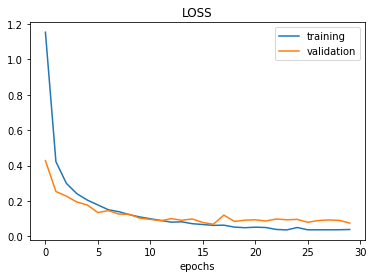

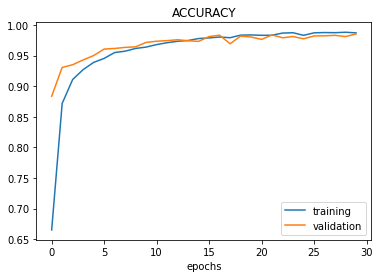

64/64 [==============================] - 1s 11ms/step - loss: 0.1129 - accuracy: 0.9823


[0.11285722255706787, 0.9823442697525024]

In [21]:

# Model 2 with 
batch_size = 32
model2_1 = Sequential([
    Conv2D(32, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal', input_shape=(28, 28, 1)),
    MaxPool2D(),

    BatchNormalization(),
    Conv2D(64, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    Conv2D(64, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    MaxPool2D(),
  
    GlobalAvgPool2D(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(26, activation='sigmoid')
])
# Compile
model2_1.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
history2_1 = model2_1.fit(
      X_train, y_train,
      batch_size=batch_size,
      epochs=30,
      validation_data=(X_valid, y_valid),
      shuffle=True
    )

plt.figure(1)
plt.plot(history2_1.history['loss'])
plt.plot(history2_1.history['val_loss'])
plt.legend(['training','validation'])
plt.title('LOSS')
plt.xlabel('epochs')

plt.figure(2)
plt.plot(history2_1.history['accuracy'])
plt.plot(history2_1.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('ACCURACY')
plt.xlabel('epochs')
plt.show()

model2_1.evaluate(X_test,y_test)




Epoch 1/30
180/180 [==============================] - 32s 173ms/step - loss: 1.6818 - accuracy: 0.5119 - val_loss: 0.6050 - val_accuracy: 0.8408
Epoch 2/30
180/180 [==============================] - 23s 125ms/step - loss: 0.5631 - accuracy: 0.8327 - val_loss: 0.3367 - val_accuracy: 0.9114
Epoch 3/30
180/180 [==============================] - 18s 99ms/step - loss: 0.3637 - accuracy: 0.8909 - val_loss: 0.2746 - val_accuracy: 0.9239
Epoch 4/30
180/180 [==============================] - 18s 100ms/step - loss: 0.2779 - accuracy: 0.9195 - val_loss: 0.2171 - val_accuracy: 0.9348
Epoch 5/30
180/180 [==============================] - 18s 99ms/step - loss: 0.2276 - accuracy: 0.9337 - val_loss: 0.1794 - val_accuracy: 0.9535
Epoch 6/30
180/180 [==============================] - 18s 99ms/step - loss: 0.1876 - accuracy: 0.9442 - val_loss: 0.1598 - val_accuracy: 0.9577
Epoch 7/30
180/180 [==============================] - 19s 104ms/step - loss: 0.1634 - accuracy: 0.9520 - val_loss: 0.1362 - val_accur

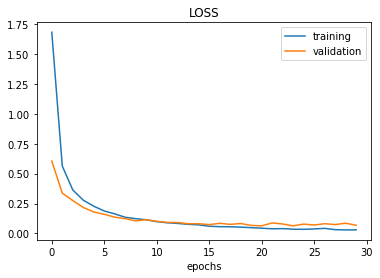

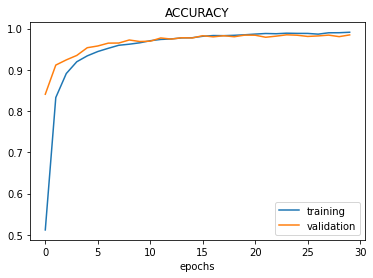

64/64 [==============================] - 1s 10ms/step - loss: 0.0841 - accuracy: 0.9814


[0.08405640721321106, 0.9813634157180786]

In [28]:

# Model 2 with 
batch_size = 128
model2_2 = Sequential([
    Conv2D(32, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal', input_shape=(28, 28, 1)),
    MaxPool2D(),

    BatchNormalization(),
    Conv2D(64, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    Conv2D(64, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    MaxPool2D(),
  
    GlobalAvgPool2D(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(26, activation='sigmoid')
])
# Compile
model2_2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
history2_2 = model2_2.fit(
      X_train, y_train,
      batch_size=batch_size,
      epochs=30,
      validation_data=(X_valid, y_valid),
      shuffle=True
    )

plt.figure(1)
plt.plot(history2_2.history['loss'])
plt.plot(history2_2.history['val_loss'])
plt.legend(['training','validation'])
plt.title('LOSS')
plt.xlabel('epochs')

plt.figure(2)
plt.plot(history2_2.history['accuracy'])
plt.plot(history2_2.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('ACCURACY')
plt.xlabel('epochs')
plt.show()

model2_2.evaluate(X_test,y_test)




Epoch 1/30
90/90 [==============================] - 17s 179ms/step - loss: 2.0202 - accuracy: 0.4241 - val_loss: 2.0766 - val_accuracy: 0.3872
Epoch 2/30
90/90 [==============================] - 16s 175ms/step - loss: 0.8047 - accuracy: 0.7653 - val_loss: 0.4698 - val_accuracy: 0.8676
Epoch 3/30
90/90 [==============================] - 16s 174ms/step - loss: 0.5205 - accuracy: 0.8481 - val_loss: 0.3412 - val_accuracy: 0.9070
Epoch 4/30
90/90 [==============================] - 16s 174ms/step - loss: 0.3929 - accuracy: 0.8839 - val_loss: 0.3164 - val_accuracy: 0.9043
Epoch 5/30
90/90 [==============================] - 16s 174ms/step - loss: 0.3138 - accuracy: 0.9101 - val_loss: 0.2389 - val_accuracy: 0.9331
Epoch 6/30
90/90 [==============================] - 16s 174ms/step - loss: 0.2660 - accuracy: 0.9232 - val_loss: 0.1977 - val_accuracy: 0.9449
Epoch 7/30
90/90 [==============================] - 16s 173ms/step - loss: 0.2287 - accuracy: 0.9331 - val_loss: 0.1841 - val_accuracy: 0.9493

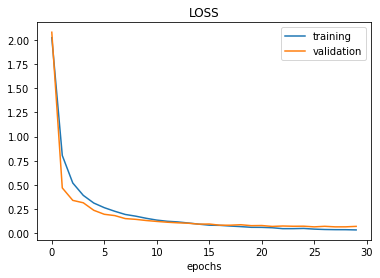

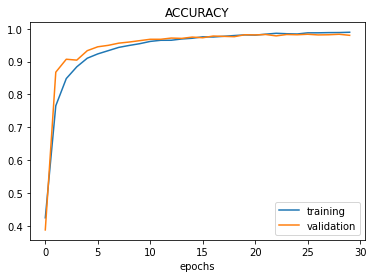

64/64 [==============================] - 1s 11ms/step - loss: 0.0873 - accuracy: 0.9823


[0.08734293282032013, 0.9823442697525024]

In [23]:

# Model 2 with 
batch_size = 256
model2_3 = Sequential([
    Conv2D(32, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal', input_shape=(28, 28, 1)),
    MaxPool2D(),

    BatchNormalization(),
    Conv2D(64, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    Conv2D(64, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    MaxPool2D(),
  
    GlobalAvgPool2D(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(26, activation='sigmoid')
])
# Compile
model2_3.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
history2_3 = model2_3.fit(
      X_train, y_train,
      batch_size=batch_size,
      epochs=30,
      validation_data=(X_valid, y_valid),
      shuffle=True
    )

plt.figure(1)
plt.plot(history2_3.history['loss'])
plt.plot(history2_3.history['val_loss'])
plt.legend(['training','validation'])
plt.title('LOSS')
plt.xlabel('epochs')

plt.figure(2)
plt.plot(history2_3.history['accuracy'])
plt.plot(history2_3.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('ACCURACY')
plt.xlabel('epochs')
plt.show()

model2_3.evaluate(X_test,y_test)




Epoch 1/20
720/720 [==============================] - 44s 60ms/step - loss: 0.5095 - accuracy: 0.8530 - val_loss: 0.2526 - val_accuracy: 0.9247
Epoch 2/20
720/720 [==============================] - 43s 60ms/step - loss: 0.1861 - accuracy: 0.9438 - val_loss: 0.1610 - val_accuracy: 0.9527
Epoch 3/20
720/720 [==============================] - 43s 59ms/step - loss: 0.1387 - accuracy: 0.9592 - val_loss: 0.1281 - val_accuracy: 0.9606
Epoch 4/20
720/720 [==============================] - 43s 59ms/step - loss: 0.1041 - accuracy: 0.9682 - val_loss: 0.1067 - val_accuracy: 0.9673
Epoch 5/20
720/720 [==============================] - 43s 59ms/step - loss: 0.0930 - accuracy: 0.9716 - val_loss: 0.1024 - val_accuracy: 0.9705
Epoch 6/20
720/720 [==============================] - 43s 60ms/step - loss: 0.0787 - accuracy: 0.9756 - val_loss: 0.1108 - val_accuracy: 0.9695
Epoch 7/20
720/720 [==============================] - 43s 60ms/step - loss: 0.0844 - accuracy: 0.9753 - val_loss: 0.0877 - val_accuracy:

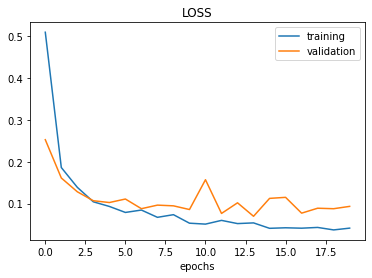

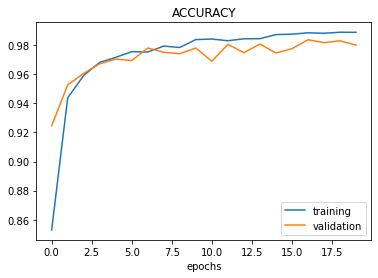

64/64 [==============================] - 1s 15ms/step - loss: 0.1378 - accuracy: 0.9745


[0.137833833694458, 0.9744973182678223]

In [29]:

# Model 3 with 
batch_size = 32
model3_1 = Sequential([
    Conv2D(32, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal', input_shape=(28, 28, 1)),
    MaxPool2D(),

    BatchNormalization(),
    Conv2D(64, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    Conv2D(64, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    MaxPool2D(),

    BatchNormalization(),
    Conv2D(128, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    Conv2D(128, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    MaxPool2D(),
  
    GlobalAvgPool2D(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(26, activation='sigmoid')
])
# Compile
model3_1.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
history3_1 = model3_1.fit(
      X_train, y_train,
      batch_size=batch_size,
      epochs=20,
      validation_data=(X_valid, y_valid),
      shuffle=True
    )

plt.figure(1)
plt.plot(history3_1.history['loss'])
plt.plot(history3_1.history['val_loss'])
plt.legend(['training','validation'])
plt.title('LOSS')
plt.xlabel('epochs')

plt.figure(2)
plt.plot(history3_1.history['accuracy'])
plt.plot(history3_1.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('ACCURACY')
plt.xlabel('epochs')
plt.show()

model3_1.evaluate(X_test,y_test)




Epoch 1/20
180/180 [==============================] - 34s 186ms/step - loss: 0.6077 - accuracy: 0.8283 - val_loss: 0.2664 - val_accuracy: 0.9244
Epoch 2/20
180/180 [==============================] - 33s 185ms/step - loss: 0.1702 - accuracy: 0.9504 - val_loss: 0.1539 - val_accuracy: 0.9552
Epoch 3/20
180/180 [==============================] - 33s 183ms/step - loss: 0.1003 - accuracy: 0.9702 - val_loss: 0.1133 - val_accuracy: 0.9663
Epoch 4/20
180/180 [==============================] - 33s 185ms/step - loss: 0.0643 - accuracy: 0.9797 - val_loss: 0.1022 - val_accuracy: 0.9685
Epoch 5/20
180/180 [==============================] - 33s 186ms/step - loss: 0.0536 - accuracy: 0.9834 - val_loss: 0.0800 - val_accuracy: 0.9793
Epoch 6/20
180/180 [==============================] - 33s 185ms/step - loss: 0.0457 - accuracy: 0.9858 - val_loss: 0.0776 - val_accuracy: 0.9796
Epoch 7/20
180/180 [==============================] - 33s 184ms/step - loss: 0.0307 - accuracy: 0.9900 - val_loss: 0.0782 - val_ac

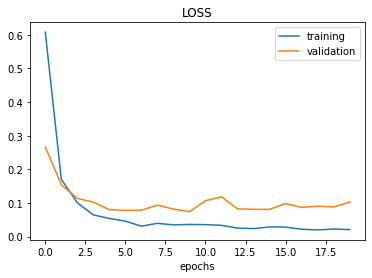

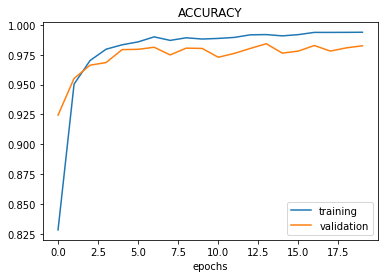

64/64 [==============================] - 1s 15ms/step - loss: 0.1241 - accuracy: 0.9804


[0.12406443059444427, 0.9803825616836548]

In [30]:

# Model 3 with 
batch_size = 128
model3_2 = Sequential([
    Conv2D(32, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal', input_shape=(28, 28, 1)),
    MaxPool2D(),

    BatchNormalization(),
    Conv2D(64, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    Conv2D(64, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    MaxPool2D(),

    BatchNormalization(),
    Conv2D(128, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    Conv2D(128, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    MaxPool2D(),
  
    GlobalAvgPool2D(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(26, activation='sigmoid')
])
# Compile
model3_2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
history3_2 = model3_2.fit(
      X_train, y_train,
      batch_size=batch_size,
      epochs=20,
      validation_data=(X_valid, y_valid),
      shuffle=True
    )

plt.figure(1)
plt.plot(history3_2.history['loss'])
plt.plot(history3_2.history['val_loss'])
plt.legend(['training','validation'])
plt.title('LOSS')
plt.xlabel('epochs')

plt.figure(2)
plt.plot(history3_2.history['accuracy'])
plt.plot(history3_2.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('ACCURACY')
plt.xlabel('epochs')
plt.show()

model3_2.evaluate(X_test,y_test)




Epoch 1/20
90/90 [==============================] - 52s 555ms/step - loss: 0.8538 - accuracy: 0.7571 - val_loss: 0.7431 - val_accuracy: 0.8107
Epoch 2/20
90/90 [==============================] - 31s 341ms/step - loss: 0.2033 - accuracy: 0.9411 - val_loss: 0.1987 - val_accuracy: 0.9404
Epoch 3/20
90/90 [==============================] - 31s 341ms/step - loss: 0.1123 - accuracy: 0.9663 - val_loss: 0.1342 - val_accuracy: 0.9596
Epoch 4/20
90/90 [==============================] - 31s 350ms/step - loss: 0.0689 - accuracy: 0.9793 - val_loss: 0.0926 - val_accuracy: 0.9759
Epoch 5/20
90/90 [==============================] - 32s 357ms/step - loss: 0.0394 - accuracy: 0.9887 - val_loss: 0.0755 - val_accuracy: 0.9783
Epoch 6/20
90/90 [==============================] - 31s 341ms/step - loss: 0.0372 - accuracy: 0.9889 - val_loss: 0.0875 - val_accuracy: 0.9776
Epoch 7/20
90/90 [==============================] - 31s 341ms/step - loss: 0.0328 - accuracy: 0.9894 - val_loss: 0.0787 - val_accuracy: 0.9806

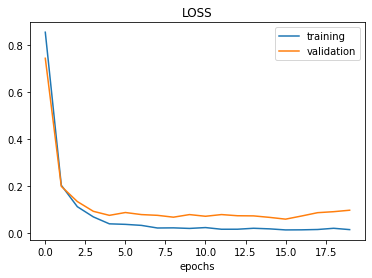

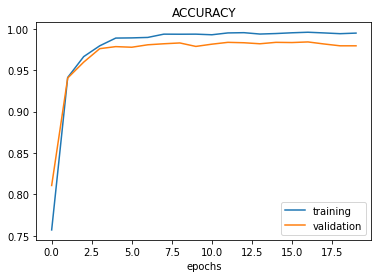

64/64 [==============================] - 1s 15ms/step - loss: 0.0893 - accuracy: 0.9823


[0.08925772458314896, 0.9823442697525024]

In [33]:

# Model 3 with 
batch_size = 256
model3_3 = Sequential([
    Conv2D(32, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal', input_shape=(28, 28, 1)),
    MaxPool2D(),

    BatchNormalization(),
    Conv2D(64, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    Conv2D(64, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    MaxPool2D(),

    BatchNormalization(),
    Conv2D(128, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    Conv2D(128, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    MaxPool2D(),
  
    GlobalAvgPool2D(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(26, activation='sigmoid')
])
# Compile
model3_3.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
history3_3 = model3_3.fit(
      X_train, y_train,
      batch_size=batch_size,
      epochs=20,
      validation_data=(X_valid, y_valid),
      shuffle=True
    )

plt.figure(1)
plt.plot(history3_3.history['loss'])
plt.plot(history3_3.history['val_loss'])
plt.legend(['training','validation'])
plt.title('LOSS')
plt.xlabel('epochs')

plt.figure(2)
plt.plot(history3_3.history['accuracy'])
plt.plot(history3_3.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('ACCURACY')
plt.xlabel('epochs')
plt.show()

model3_3.evaluate(X_test,y_test)




# **Model Prediction**

1/1 [==============================] - 0s 17ms/step


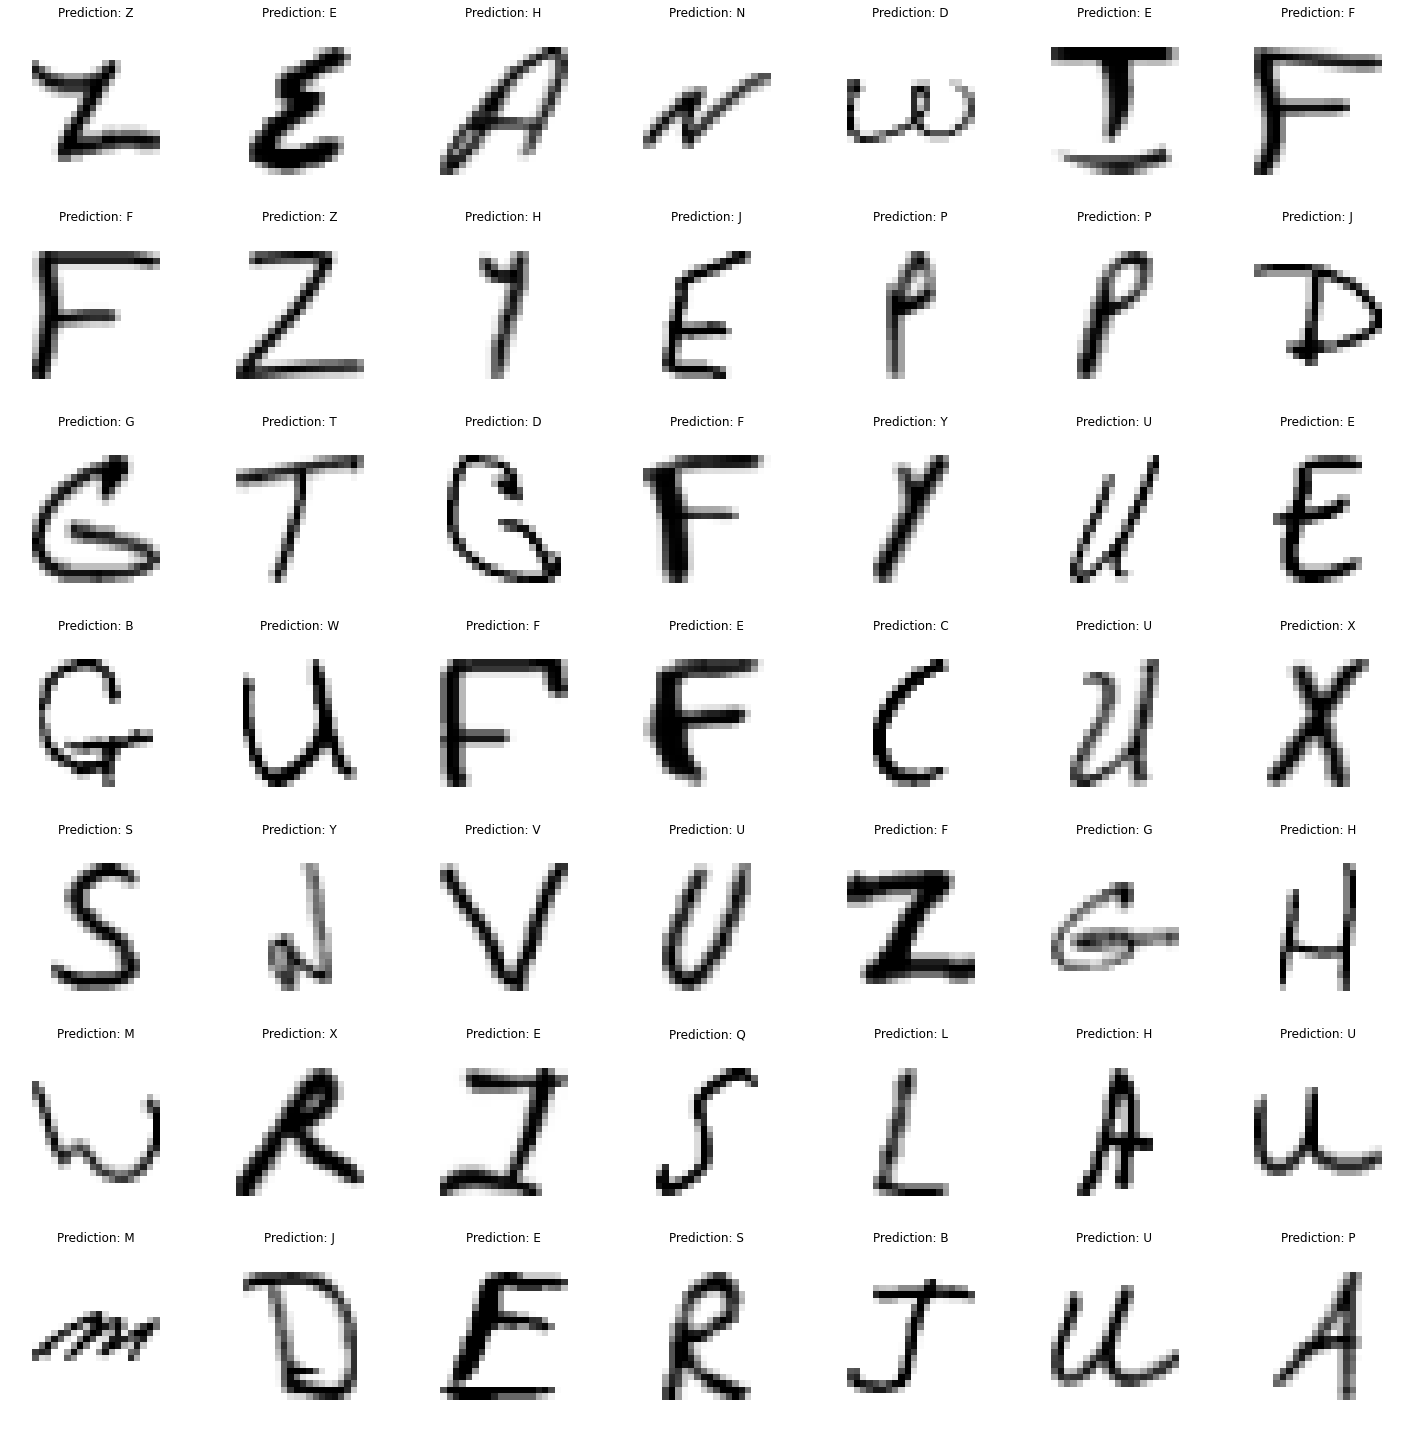

In [52]:
plt.figure(figsize=(20,20))

# Change to the model you want to see
model = model1_3

for i in range(1, 50):
    id = np.random.randint(len(X_test))
    image = X_test[id].reshape(28,28)
    pred = chr(int(np.argmax(model.predict(image.reshape(-1,28,28,1))))+65)
    plt.subplot(7,7,i)
    plt.imshow(image, cmap='binary')
    plt.title(f"Prediction: {pred}")
    plt.axis('off')
plt.tight_layout()

